In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

ROOT = '/data6/lekevin/cayman'
df = pd.DataFrame()
for i in range(1,4):
    if i == 3:
        filename = os.path.join(ROOT, 'rawdata/yolksac.txt')
    else:
        filename = os.path.join(ROOT,'rawdata/classes_EC{}_1516combined.txt'.format(i))
    temp = pd.read_csv(filename, sep=' ', names=['image', 'label', 'cool_example'], header=None)
    temp['day'] = ['EC{}'.format(i)] * temp.shape[0]
    df = df.append(temp, ignore_index=True)

IOError: [Errno 2] No such file or directory: '/data6/lekevin/cayman/rawdata/EC3_SPC_Images_3-COLOR/SPC-BIG-1487311681-151937-000-2764-2172-104-120.tif'

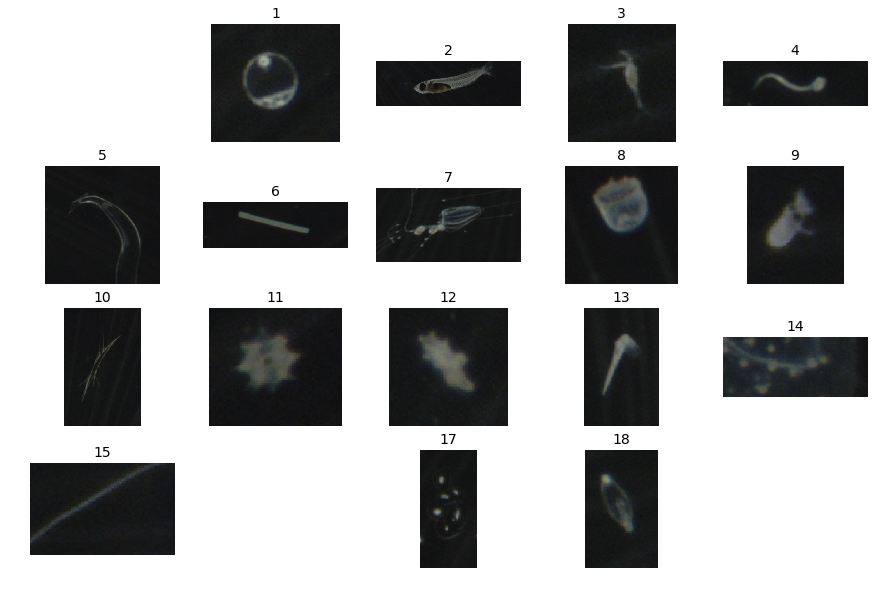

In [38]:
df_groups = df.groupby('label')
numClasses = 19
numCols = 5
numRows = int(max(numClasses/numCols+1,2))
numPlots = int(np.ceil(numRows/5.))
for p in range(numPlots):
    fig, axarr = plt.subplots(min(numRows, 5),numCols, figsize=(15,10))
    for i in range(len(axarr)):
        for j in range(len(axarr[0])):
            axarr[i,j].set_axis_off()
for i in range(1,20):
    if i == 16:
        continue
    randomIdx = np.random.choice(df_groups.get_group(i).index)
    imgname = os.path.join(ROOT, 'rawdata/{}_SPC_Images_3-COLOR'.format(df['day'].iloc[randomIdx]), df['image'].iloc[randomIdx])
    img = plt.imread(imgname)
    axarr[i/numCols,i%numCols].imshow(img)
    axarr[i/numCols,i%numCols].set_axis_off()
    axarr[i/numCols,i%numCols].set_title('{}'.format(i), fontsize=14)
plt.show()

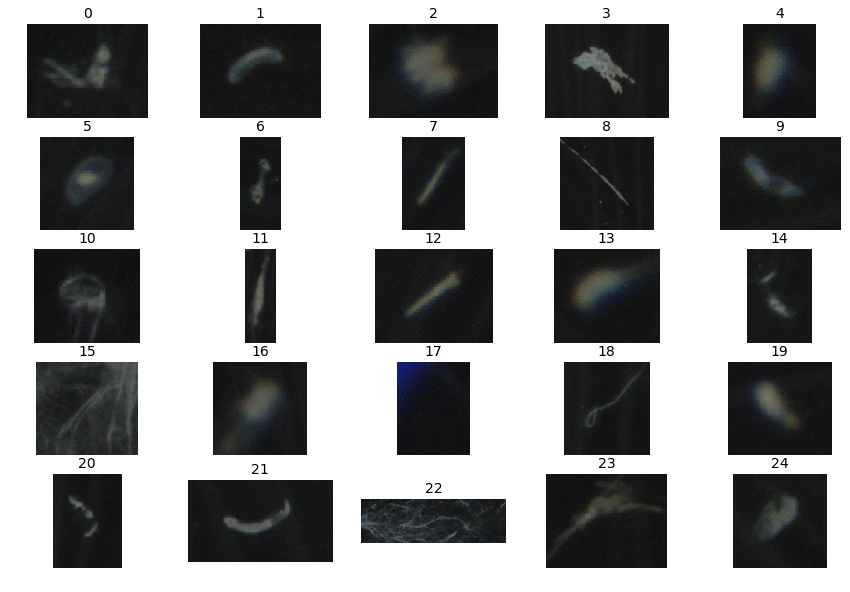

In [37]:
df_groups = df.groupby('label')
numClasses = 24
numCols = 5
numRows = int(max(numClasses/numCols+1,2))
numPlots = int(np.ceil(numRows/5.))
for p in range(numPlots):
    fig, axarr = plt.subplots(min(numRows, 5),numCols, figsize=(15,10))
    for i in range(len(axarr)):
        for j in range(len(axarr[0])):
            axarr[i,j].set_axis_off()
for i in range(numClasses+1):
    randomIdx = np.random.choice(df_groups.get_group(15).index)
    imgname = os.path.join(ROOT, 'rawdata/{}_SPC_Images_3-COLOR'.format(df['day'].iloc[randomIdx]), df['image'].iloc[randomIdx])
    img = plt.imread(imgname)
    axarr[i/numCols,i%numCols].imshow(img)
    axarr[i/numCols,i%numCols].set_axis_off()
    axarr[i/numCols,i%numCols].set_title('{}'.format(i), fontsize=14)
plt.show()

In [38]:
from tools.dataset import SPCDataset
import caffe
import cv2
import scipy

root = '/data6/lekevin/cayman'
img_dir = '/data6/lekevin/cayman/rawdata'
version = 1
csv_filename = os.path.join(root, 'data', str(version), 'data_{}.csv')

# Test initialization
dataset = {phase: SPCDataset(csv_filename=csv_filename.format(phase), img_dir=img_dir, phase=phase) for phase in ['train', 'val', 'test']}
for phase in dataset:
    print(dataset[phase])
fns, lbls = dataset['train'].get_fns()

Dataset [test] 1 classes, 196169 images
Dataset [train] 6 classes, 7846 images
Dataset [val] 6 classes, 1385 images


In [40]:
try:
    fns, lbls = dataset['val'].get_fns()
    for i,fn in enumerate(fns):
        img = caffe.io.load_image(fn)
        if i%1000==0:
            print('{} / {}'.format(i, len(fns)))
except:
    print fn

0 / 1385
1000 / 1385


In [35]:
filename1 = '/data6/lekevin/cayman/rawdata/EC1_SPC_Images_3-COLOR/SPC-BIG-1487120301-027488-002-848-1860-120-176.tif'
filename = '/data6/lekevin/cayman/rawdata/EC2_SPC_Images_3-COLOR/SPC-BIG-1487257611-021130-006-1744-32-64-72.tif'
#img = caffe.io.load_image(filename)
#img = scipy.misc.imread(filename)
# img = cv2.imread(filename)
os.path.exists(filename)

False

In [26]:
fns = lbls = dataset['val'].get_fns()
nonExist=[i for i in fns if not os.path.exists(i)]

['/data6/lekevin/cayman/rawdata/EC1_SPC_Images_3-COLOR/SPC-BIG-1487151814-092328-000-1148-2208-112-104.tif']